Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = ""
COLLABORATORS = ""

---

In [15]:
!pip install --upgrade seaborn


### Example Code

This is example code to get you started on Assignment 3. To get full credit for your analysis, you need to go significanly beyond what is given here (you can use the results below as a starting point, but these are just a superficial summary analysis). In particular, you need to evaluate the detectors using several of the metrics we discussed in class, making different groupings.

*We will not grade this file*, you need to submit the code you used in your report in a separate A3_code.ipynb file

In [16]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [17]:
df_essay = pd.read_csv('A3CleanedEssayData.csv')
df_essay.columns

Index(['id', 'essay_prompt', 'authorship', 'class_type', 'grade_letter',
       'gptzero_label', 'gptzero_ai_percent', 'contentdetector_label',
       'contentdetector_ai_percent', 'sapling_fake_percent',
       'copyleaks_ai_percent'],
      dtype='object')

## Number of essays by Written By type

In [18]:
df_essay.groupby("authorship").id.count()

authorship
AI-generated                                      108
Entirely written by me                            115
Partly written by me, partly by AI                 52
Written by me, but grammar was corrected by AI     34
Name: id, dtype: int64

## Cross table of Essays by written by type and GPTZero Prediction
(This has the FP/FN values)

In [19]:

pd.pivot_table(data=df_essay,index='authorship',columns=['gptzero_label'],values='id',aggfunc='count')


gptzero_label,AI,Human,Mixed
authorship,,,
AI-generated,85,10,13
Entirely written by me,4,104,7
"Partly written by me, partly by AI",16,22,14
"Written by me, but grammar was corrected by AI",3,28,3


## Cross table of Essays by written by type and ContentDetectorAI Prediction
(This has the FP/FN values)

In [20]:
pd.pivot_table(data=df_essay,index='authorship',columns=['contentdetector_label'],values='id',aggfunc='count')


contentdetector_label,Likely AI,Likely Human,Likely Human with AI,May Have AI
authorship,,,,
AI-generated,41,37,10,20
Entirely written by me,13,79,14,9
"Partly written by me, partly by AI",12,21,8,11
"Written by me, but grammar was corrected by AI",5,17,2,10


## Average score by type

In [21]:
pd.pivot_table(data=df_essay,index='authorship',values=['gptzero_ai_percent','contentdetector_ai_percent', 'sapling_fake_percent', 'copyleaks_ai_percent'],aggfunc='mean')


,contentdetector_ai_percent,copyleaks_ai_percent,gptzero_ai_percent,sapling_fake_percent
authorship,,,,
AI-generated,57.296296,89.787037,84.620370,92.925000
Entirely written by me,32.443478,12.317391,6.922348,37.853913
"Partly written by me, partly by AI",50.582692,52.242308,41.898077,68.328846
"Written by me, but grammar was corrected by AI",40.647059,45.111765,16.150882,45.264706


## Distributions of Scores over all essays

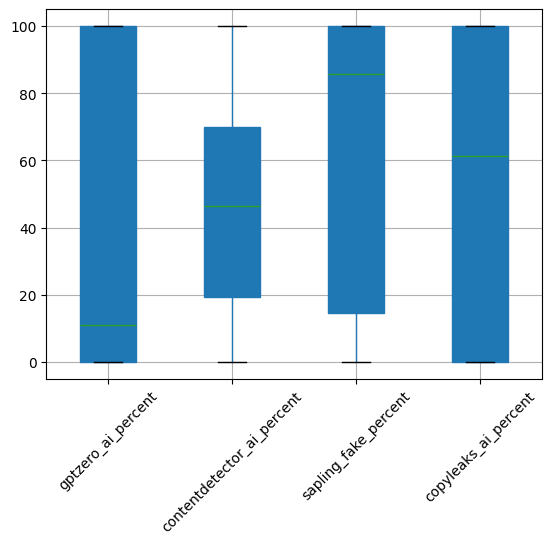

In [22]:
labels = ['GPTZero', 'ContentDetectorAI', 'Sapling', 'Copyleaks']

boxplot = df_essay.boxplot(column=['gptzero_ai_percent','contentdetector_ai_percent', 'sapling_fake_percent', 'copyleaks_ai_percent'],
                           vert=True,  # vertical box alignment
          patch_artist=True,  # fill with color
        rot=45)  # rotate labels)
plt.show()          

### Comparison of GPTZero Scores by Written type

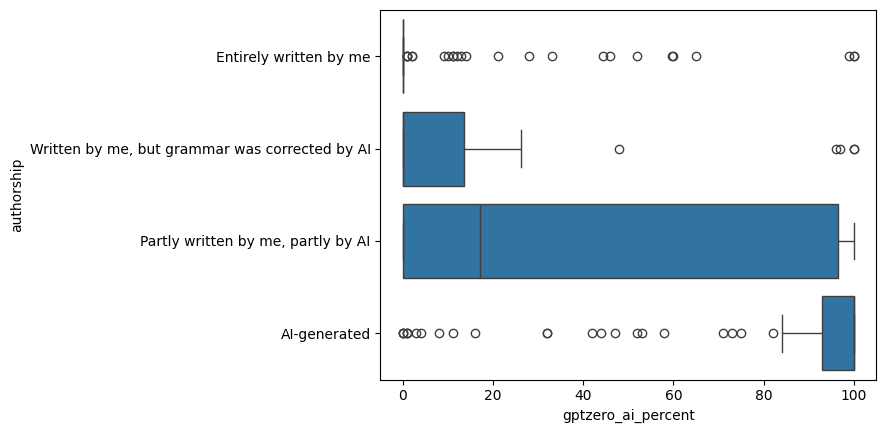

In [23]:
gptzero_boxplot = sns.boxplot(data=df_essay, x='gptzero_ai_percent',y='authorship',
                              order=['Entirely written by me', 'Written by me, but grammar was corrected by AI','Partly written by me, partly by AI', 'AI-generated'])
plt.show()

### Comparison of ContentDetector Scores by Written type

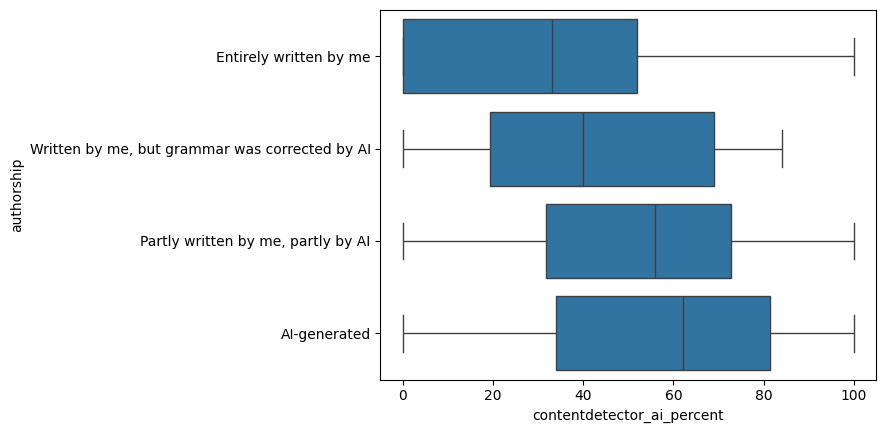

In [24]:
contentDetector_boxplot = sns.boxplot(data=df_essay, x='contentdetector_ai_percent',y='authorship',
                              order=['Entirely written by me', 'Written by me, but grammar was corrected by AI','Partly written by me, partly by AI', 'AI-generated'])
plt.show()

### Comparison of  Sapling scores by Written type

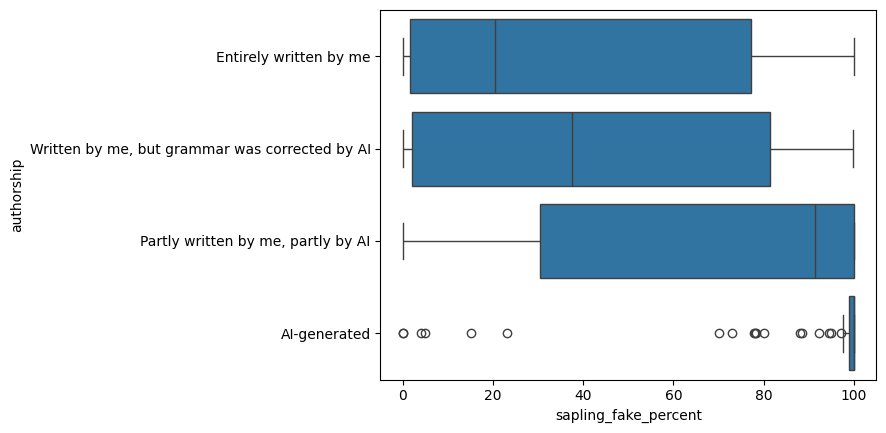

In [25]:
sapling_boxplot = sns.boxplot(data=df_essay, x='sapling_fake_percent',y='authorship',
                              order=['Entirely written by me', 'Written by me, but grammar was corrected by AI','Partly written by me, partly by AI', 'AI-generated'])
plt.show()

### Comparison of Copyleak Scores by Written type

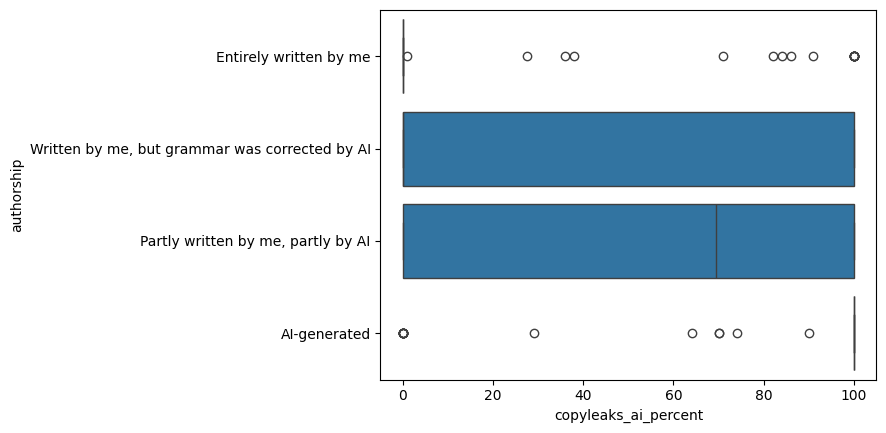

In [26]:
copyleaks_boxplot = sns.boxplot(data=df_essay, x='copyleaks_ai_percent',y='authorship',
                              order=['Entirely written by me', 'Written by me, but grammar was corrected by AI','Partly written by me, partly by AI', 'AI-generated'])
plt.show()

## Let's redo the error tables but based on values
using the recommended ranges for each tool
more: https://gptzero.me/news/ai-accuracy-benchmarking/

In [27]:
gpt_zero_bins = [-1, 50, 87, 100]
gpt_zero_labels=['0-50','50-87','87-100']

pd.pivot_table(data=df_essay,index='authorship',columns=pd.cut(df_essay['gptzero_ai_percent'], bins=gpt_zero_bins, labels=gpt_zero_labels),values='id',aggfunc='count',observed=False)


gptzero_ai_percent,0-50,50-87,87-100
authorship,,,
AI-generated,16,8,84
Entirely written by me,108,4,3
"Partly written by me, partly by AI",31,3,18
"Written by me, but grammar was corrected by AI",30,0,4


In [28]:
contentdetectorai_bins = [-1, 50, 75, 100]
contentdetectorai_labels=['0-50','50-75','76-100']

pd.pivot_table(data=df_essay,index='authorship',columns=pd.cut(df_essay['contentdetector_ai_percent'], bins=contentdetectorai_bins, labels=contentdetectorai_labels),values='id',aggfunc='count',observed=False)


contentdetector_ai_percent,0-50,50-75,76-100
authorship,,,
AI-generated,38,31,39
Entirely written by me,85,19,11
"Partly written by me, partly by AI",23,19,10
"Written by me, but grammar was corrected by AI",21,11,2


In [29]:
sapling_bins = [-1, 50, 87, 100]
sapling_labels=['0-50','50-87','87-100']

pd.pivot_table(data=df_essay,index='authorship',columns=pd.cut(df_essay['sapling_fake_percent'], bins=sapling_bins, labels=sapling_labels),values='id',aggfunc='count',observed=False)


sapling_fake_percent,0-50,50-87,87-100
authorship,,,
AI-generated,6,6,96
Entirely written by me,73,19,23
"Partly written by me, partly by AI",16,9,27
"Written by me, but grammar was corrected by AI",18,9,7


In [30]:
copyleaks_bins = [-1, 50, 85, 100]
copyleaks_labels=['0-50','50-84','85-100']

pd.pivot_table(data=df_essay,index='authorship',columns=pd.cut(df_essay['copyleaks_ai_percent'], bins=copyleaks_bins, labels=copyleaks_labels),values='id',aggfunc='count',observed=False)


copyleaks_ai_percent,0-50,50-84,85-100
authorship,,,
AI-generated,10,4,94
Entirely written by me,101,3,11
"Partly written by me, partly by AI",25,3,24
"Written by me, but grammar was corrected by AI",18,1,15


## Confusion Matrix

In [45]:
# 1 = AI-generated, 0 = human
# we will be counting the number of AI vs human written essays
# Counted only essays that are marked explicitely as AI
df_essay['is_ai'] = (df_essay['authorship'] == "AI-generated").astype(int)
df_essay['is_ai'].value_counts()

is_ai
0    202
1    108
Name: count, dtype: int64

In [46]:
#Build the confusion matrix and compute the metrics

def confusion_metrics_from_scores(df, y_true_col, score_col, threshold):
    y_true = df[y_true_col].values
    y_pred = (df[score_col] >= threshold).astype(int).values

    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    tn = np.sum((y_true == 0) & (y_pred == 0))

    confusion_m = pd.DataFrame(
        [[tp, fn], [fp, tn]],
        index=['Actual AI', 'Actual Human'],
        columns=['Predicted AI', 'Predicted Human']
    )

    metrics = {
        'Accuracy': (tp + tn) / (tp + fp + fn + tn),
        'PPV': tp / (tp + fp) if (tp + fp) > 0 else np.nan,
        'NPV': tn / (tn + fn) if (tn + fn) > 0 else np.nan,
        'TPR (Sensitivity)': tp / (tp + fn) if (tp + fn) > 0 else np.nan,
        'TNR (Specificity)': tn / (tn + fp) if (tn + fp) > 0 else np.nan,
        'Prevalence': (tp + fn) / (tp + fp + fn + tn)
    }

    return confusion_m, metrics

In [33]:
#Loop through each detector and set threshold which can be modified to analyze futher
detectors = {
    'GPTZero': ('gptzero_ai_percent', 70),
    'ContentDetectorAI': ('contentdetector_ai_percent', 70),
    'Sapling': ('sapling_fake_percent', 90),
    'Copyleaks': ('copyleaks_ai_percent', 80)
}

results = {}

for name, (col, thr) in detectors.items():
    confusion_m, mets = confusion_metrics_from_scores(df_essay, 'is_ai', col, thr)
    results[name] = {'threshold': thr, 'cm': confusion_m, 'metrics': mets}

    print(f'\n{name} (threshold = {thr}%)')
    display(confusion_m)
    print(pd.Series(mets))


GPTZero (threshold = 70%)


,Predicted AI,Predicted Human
Actual AI,89,19
Actual Human,27,175


Accuracy             0.851613
PPV                  0.767241
NPV                  0.902062
TPR (Sensitivity)    0.824074
TNR (Specificity)    0.866337
Prevalence           0.348387
dtype: float64

ContentDetectorAI (threshold = 70%)


,Predicted AI,Predicted Human
Actual AI,46,62
Actual Human,35,167


Accuracy             0.687097
PPV                  0.567901
NPV                  0.729258
TPR (Sensitivity)    0.425926
TNR (Specificity)    0.826733
Prevalence           0.348387
dtype: float64

Sapling (threshold = 90%)


,Predicted AI,Predicted Human
Actual AI,94,14
Actual Human,57,145


Accuracy             0.770968
PPV                  0.622517
NPV                  0.911950
TPR (Sensitivity)    0.870370
TNR (Specificity)    0.717822
Prevalence           0.348387
dtype: float64

Copyleaks (threshold = 80%)


,Predicted AI,Predicted Human
Actual AI,94,14
Actual Human,54,148


Accuracy             0.780645
PPV                  0.635135
NPV                  0.913580
TPR (Sensitivity)    0.870370
TNR (Specificity)    0.732673
Prevalence           0.348387
dtype: float64


## Prediction Fairness

In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import average_precision_score, roc_auc_score

In [69]:
def fairness_metrics_from_scores(df, y_true_col, score_col, threshold):
    y_true = df[y_true_col].values
    y_pred = (df[score_col] >= threshold).astype(int).values

    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    tn = np.sum((y_true == 0) & (y_pred == 0))

    fairness_m = pd.DataFrame(
        [[tp, fn], [fp, tn]],
        index=['Actual AI', 'Actual Human'],
        columns=['Predicted AI', 'Predicted Human']
    )

    metrics = {
        'sample_size': (tp + tn + fp + fn),
        'selection_rate': (tp + fp) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else np.nan,
        'FNR': fn / (fn + tp) if (fn + tp) > 0 else np.nan,
        'FPR': fp / (fp + tn) if (fp + tn) > 0 else np.nan,
        'accuracy': (tp + tn) / (tp + fp + fn + tn) if (tp + fp + fn + tn) > 0 else np.nan,
        'average_precision': average_precision_score(y_true, y_pred),
        'roc_auc_score': roc_auc_score(y_true, y_pred)
    }

    return fairness_m, metrics

In [70]:
# compute metrics by class_type
def fairness_metrics_by_class_type(df, y_true_col, score_col, threshold):
    results_by_class = {}
   
    class_types = df['class_type'].dropna().unique()
    
    for class_type in class_types:
        class_df = df[df['class_type'] == class_type]
        
        if len(class_df) > 0:
            fairness_m, metrics = fairness_metrics_from_scores(class_df, y_true_col, score_col, threshold)
            results_by_class[class_type] = {
                'fairness_matrix': fairness_m,
                'metrics': metrics,
                'sample_count': len(class_df)
            }
    
    return results_by_class

In [ ]:
detectors = {
    'GPTZero': ('gptzero_ai_percent', 70),
    'ContentDetectorAI': ('contentdetector_ai_percent', 70),
    'Sapling': ('sapling_fake_percent', 70),
    'Copyleaks': ('copyleaks_ai_percent', 70)
}

if 'is_ai' not in df_essay.columns:
    df_essay['is_ai'] = df_essay['authorship'].apply(
        lambda x: 1 if 'AI' in str(x) or 'ai' in str(x).lower() else 0
    )

overall_results = {}
grouped_results = {}

for name, (col, thr) in detectors.items():
    print(f"{name} (threshold = {thr}%)")
    
    # Overall metrics
    fairness_m, mets = fairness_metrics_from_scores(df_essay, 'is_ai', col, thr)
    overall_results[name] = {'threshold': thr, 'cm': fairness_m, 'metrics': mets}
    
    # Metrics by class type
    class_results = fairness_metrics_by_class_type(df_essay, 'is_ai', col, thr)
    grouped_results[name] = class_results
    
    # Create a summary dataframe for easy comparison
    summary_data = []
    for class_type, results in class_results.items():
        metrics = results['metrics']
        summary_data.append({
            'class_type': class_type,
            'sample_size': metrics['sample_size'],
            'FPR': metrics['FPR'],
            'FNR': metrics['FNR'],
            'accuracy': metrics['accuracy'],
            'selection_rate': metrics['selection_rate'],
            'roc_auc': metrics['roc_auc_score']
        })
    
    summary_df = pd.DataFrame(summary_data)
    display(summary_df)

GPTZero (threshold = 70%)


,class_type,sample_size,FPR,FNR,accuracy,selection_rate,roc_auc
0,English,77,0.048387,0.133333,0.935065,0.207792,0.909140
1,Ethics,25,0.315789,0.000000,0.760000,0.480000,0.842105
2,Other,106,0.147541,0.200000,0.830189,0.424528,0.826230
3,History,67,0.166667,0.280000,0.791045,0.373134,0.776667
4,Technology,30,0.062500,0.000000,0.966667,0.500000,0.968750
5,Economics,5,0.500000,0.333333,0.600000,0.600000,0.583333


ContentDetectorAI (threshold = 70%)


,class_type,sample_size,FPR,FNR,accuracy,selection_rate,roc_auc
0,English,77,0.145161,0.533333,0.779221,0.207792,0.660753
1,Ethics,25,0.105263,0.500000,0.800000,0.200000,0.697368
2,Other,106,0.213115,0.466667,0.679245,0.349057,0.660109
3,History,67,0.142857,0.760000,0.626866,0.179104,0.548571
4,Technology,30,0.250000,0.642857,0.566667,0.300000,0.553571
5,Economics,5,0.500000,0.666667,0.400000,0.400000,0.416667


Sapling (threshold = 70%)


,class_type,sample_size,FPR,FNR,accuracy,selection_rate,roc_auc
0,English,77,0.306452,0.000000,0.753247,0.441558,0.846774
1,Ethics,25,0.473684,0.000000,0.640000,0.600000,0.763158
2,Other,106,0.508197,0.088889,0.669811,0.679245,0.701457
3,History,67,0.476190,0.080000,0.671642,0.641791,0.721905
4,Technology,30,0.437500,0.000000,0.766667,0.700000,0.781250
5,Economics,5,1.000000,0.000000,0.600000,1.000000,0.500000


Copyleaks (threshold = 70%)


,class_type,sample_size,FPR,FNR,accuracy,selection_rate,roc_auc
0,English,77,0.209677,0.133333,0.805195,0.337662,0.828495
1,Ethics,25,0.421053,0.166667,0.640000,0.520000,0.706140
2,Other,106,0.344262,0.066667,0.773585,0.594340,0.794536
3,History,67,0.238095,0.160000,0.791045,0.462687,0.800952
4,Technology,30,0.187500,0.000000,0.900000,0.566667,0.906250
5,Economics,5,0.500000,0.333333,0.600000,0.600000,0.583333


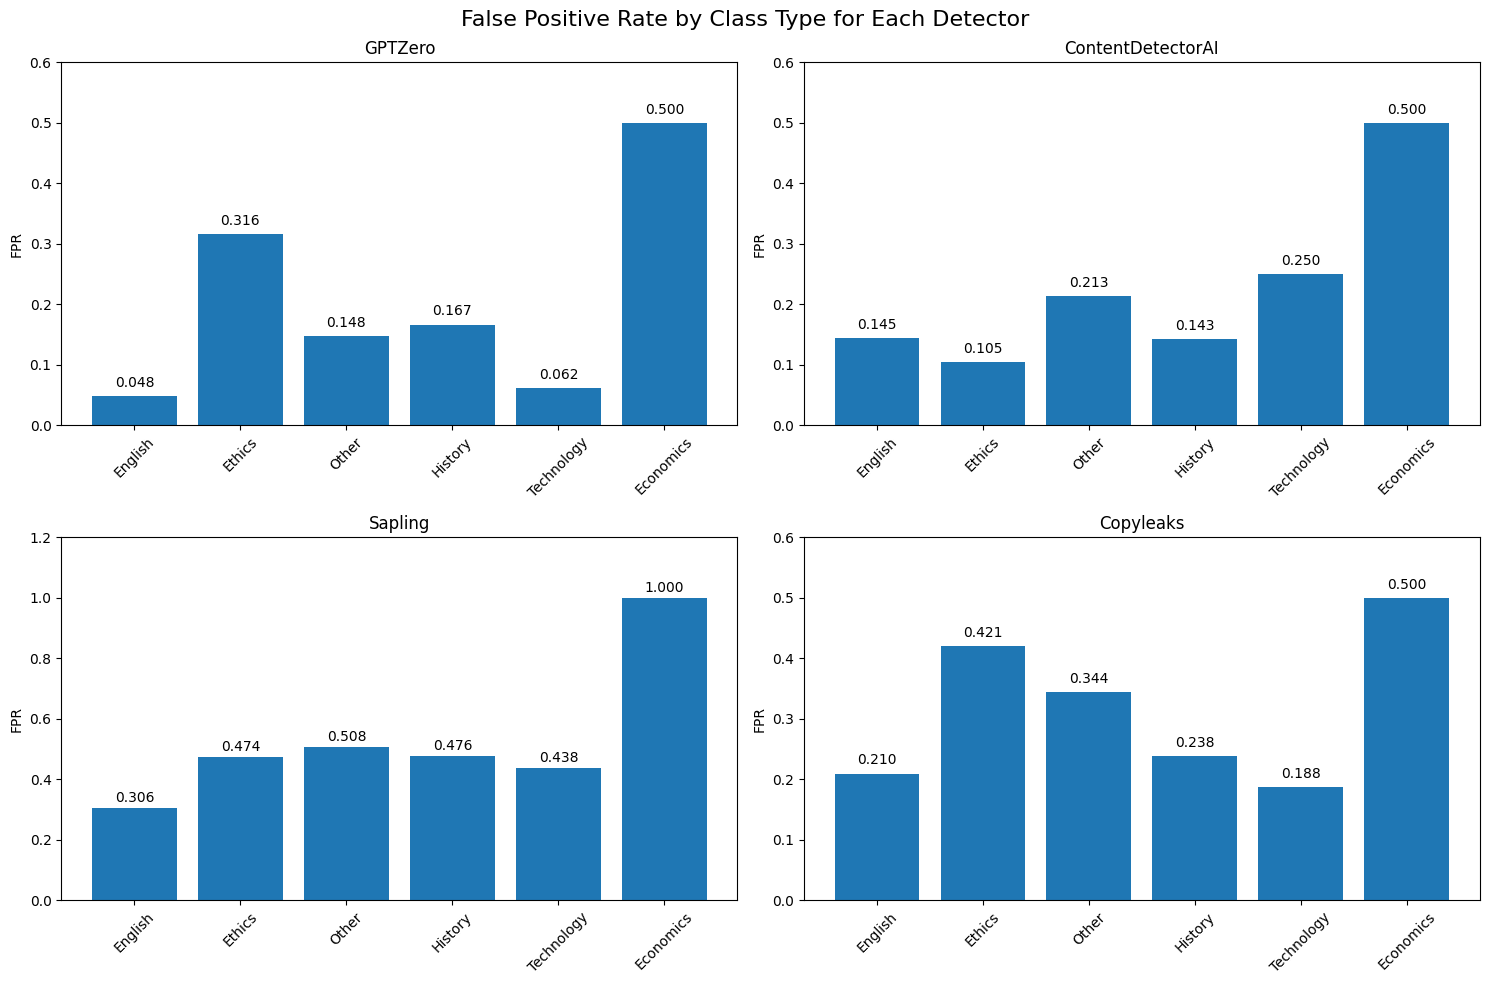

In [72]:
import matplotlib.pyplot as plt

# Example: Compare FPR across class types for each detector
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('False Positive Rate by Class Type for Each Detector', fontsize=16)

for idx, (detector_name, class_results) in enumerate(grouped_results.items()):
    ax = axes[idx // 2, idx % 2]
    
    class_types = list(class_results.keys())
    fpr_values = [class_results[ct]['metrics']['FPR'] for ct in class_types]
    
    ax.bar(class_types, fpr_values)
    ax.set_title(f'{detector_name}')
    ax.set_ylabel('FPR')
    ax.set_ylim(0, max(fpr_values) * 1.2)
    ax.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for i, v in enumerate(fpr_values):
        ax.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()